<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede neural utilizando dados sobre câncer de próstata
> Dataset: [Prostate cancer](https://www.kaggle.com/sajidsaifi/prostate-cancer)

## 1. Leitura dos dados

In [67]:
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AFqaq9K2mscunacZ8eIkq6L8EH7XsZofHUbG8Ak63D-z45khW8GXIM
Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_3/ca_prostata.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## 2. Limpeza e organização dos dados

### 2.1 Limpeza dos dados

#### 2.1.1 Remoção da coluna 'id'

In [4]:
data = data.dropna()
data = data.drop(columns = ['id'])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


#### 2.1.2 Mudança dos valores 'B' e 'M' para '0' e '1'

In [5]:
data['diagnosis_result'] = data['diagnosis_result'].replace(['B', 'M'], [0, 1])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


### 2.2 Re-escala dos dados usando máximo e mínimo

In [6]:
data = (data - data.min()) / (data.max() - data.min())
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,1.0,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,1.0,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,1.0,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


### 2.3 Divisão dos dados

#### 2.3.1 Atributos de classe

Os atributos de classe para este dataset são:
*   B (*benign*) com valor 0.0
*   M (*malign*) com valor 1.0



In [7]:
y = data.diagnosis_result
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: diagnosis_result, dtype: float64

#### 2.3.2 Atributos descritores

Os atributos descritores para este dataset são:
*    *radius*
*    *texture*
*    *perimeter*
*    *area*
*    *smoothness*
*    *compactness*
*    *symmetry*
*    *fractal_dimension*

In [8]:
x = data.iloc[:, 1:]
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


#### 2.3.3 Conjunto de treino e conjunto de teste

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2)

##### Conjunto de treino para os atributos de classe

In [53]:
y_train.head()

2     1.0
0     1.0
50    0.0
74    0.0
89    0.0
Name: diagnosis_result, dtype: float64

##### Conjunto de treino para os atributos descritores

In [54]:
x_train.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
50,0.6250,0.8750,0.191667,0.134845,0.219178,0.039088,0.088757,0.136364
74,0.5625,0.1250,0.225000,0.160501,0.301370,0.097720,0.218935,0.136364
89,0.1875,0.7500,0.366667,0.268496,0.589041,0.312704,0.455621,0.227273


## 3. Treinamento e testes

### 3.1 Rede neural *multi-layer perceptron* (MLP)

#### 3.1.1 Definição do modelo

In [55]:
mlp_cls = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=1000)

#### 3.1.2 Treinamento do modelo

In [56]:
mlp_cls.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### 3.1.3 Classificação utilizando o modelo

In [75]:
rating = mlp_cls.predict(x_test)
rating

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1.])

#### 3.1.4 Avaliando os resultados do modelo

##### Acurácia

A taxa de acertos do classificador é de 75%.

In [76]:
round(accuracy_score(y_test, rating), 2)

0.75

##### Precisão

A taxa de precisão do classificador é de 89%.

In [77]:
round(precision_score(y_test, rating), 2)

0.89

##### *Recall*

O *recall* (taxa de instâncias positivas classificadas pelo modelo corretamente) é de 67%.

In [78]:
round(recall_score(y_test, rating), 2)

0.67

##### *F1*-*score*

A taxa do *F1*-*score* é de 76%.

In [79]:
round(f1_score(y_test, rating), 2)

0.76

##### Curva ROC e AUC

##### Curva ROC

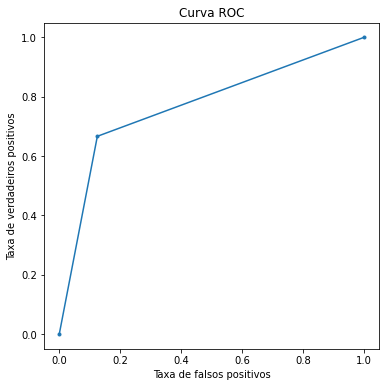

In [80]:
plt.figure(figsize = (6, 6))
fpr, tpr, _ = roc_curve(y_test, rating)
plt.plot(fpr, tpr, marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.show()

##### AUC

A taxa da AUC é de 77%.

In [81]:
round(roc_auc_score(y_test, rating), 2)

0.77

##### Validação cruzada

In [70]:
cross_vld = cross_val_score(mlp_cls, x, y, cv=10)
cross_vld

array([0.7, 0.8, 1. , 1. , 0.9, 0.6, 0.8, 0.8, 0.8, 1. ])

In [82]:
round(cross_vld.mean(), 2), round(cross_vld.std(), 2)

(0.84, 0.13)

## 4. Considerações

*    Diante da natureza do dataset e das métricas para análise do classificador, o valor obtido pela rede neural no *recall* foi de 67%, um valor que pode ser considerado baixo (Subseção 3.1.4). Tendo em vista que nesta métrica, leva-se em consideração a taxa de verdadeiros positivos e que são classificados pelo modelo de forma correta.
*    No entanto, a taxa de verdadeiros positivos foi de 77% e pode ser verificada a partir da área sob a curva - AUC - (Subseção 3.1.4).
*   Utilizando o método de validação cruzada pôde-se observar uma taxa maior em relação a média de acertos durante a classificação, sendo de 84%  (Subseção 3.1.4).